In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This will likely need to change everytime if your path looks different to mine... thats annoying

In [ ]:
PATH_TO_PROJECT = '/content/drive/Othercomputers/My MacBook Pro/GitHub/FAERS-analytics'

In [ ]:
%cd $PATH_TO_PROJECT

/content/drive/Othercomputers/My MacBook Pro/GitHub/FAERS-analytics


In [ ]:
!ls

 data   data-out  'FAERS analytics.ipynb'   README.md


In [ ]:
import os

output_path_dir = 'data-out/'
input_path_dir = 'data/'

if not os.path.isdir(output_path_dir):
  !mkdir $output_path_dir

for file in os.listdir(input_path_dir):
  if file.endswith(".zip"):
    input_path_file = input_path_dir + file
    output_path_file = output_path_dir + file.split('.zip')[0]
    if not os.path.isdir(output_path_file):
      !mkdir $output_path_file
      !unzip $input_path_file -d $output_path_file

In [ ]:
!ls $output_path_dir

FAERS_ASCII_2023_Q3  FAERS_ASCII_2023_Q4


In [ ]:
q3_dir = output_path_dir + 'FAERS_ASCII_2023_Q3/ASCII/'
!ls $q3_dir

ASC_NTS.pdf   DRUG23Q3.pdf  INDI23Q3.txt  REAC23Q3.pdf	RPSR23Q3.txt
DEMO23Q3.pdf  DRUG23Q3.txt  OUTC23Q3.pdf  REAC23Q3.txt	THER23Q3.pdf
DEMO23Q3.txt  INDI23Q3.pdf  OUTC23Q3.txt  RPSR23Q3.pdf	THER23Q3.txt


In [ ]:
q4_dir = output_path_dir + 'FAERS_ASCII_2023_Q4/ASCII/'
!ls $q4_dir

ASC_NTS.pdf   DRUG23Q4.pdf  INDI23Q4.txt  REAC23Q4.pdf	RPSR23Q4.txt
DEMO23Q4.pdf  DRUG23Q4.txt  OUTC23Q4.pdf  REAC23Q4.txt	THER23Q4.pdf
DEMO23Q4.txt  INDI23Q4.pdf  OUTC23Q4.txt  RPSR23Q4.pdf	THER23Q4.txt


In [ ]:
import pandas as pd

data = {}
directories = [q3_dir, q4_dir]


for directory in directories:
  for file in os.listdir(directory):
    if file.endswith(".txt"):
      input_path_file = './' + directory + file
      output_data_frame_name = file.split('.txt')[0]
      output_data_frame = pd.read_csv(input_path_file, sep='$')
      data[output_data_frame_name] = output_data_frame

data.keys()


<ipython-input-30-1f57bd4ffc9c>:12: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  output_data_frame = pd.read_csv(input_path_file, sep='$')
<ipython-input-30-1f57bd4ffc9c>:12: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  output_data_frame = pd.read_csv(input_path_file, sep='$')


dict_keys(['THER23Q3', 'RPSR23Q3', 'DRUG23Q3', 'REAC23Q3', 'INDI23Q3', 'OUTC23Q3', 'DEMO23Q3', 'THER23Q4', 'DRUG23Q4', 'RPSR23Q4', 'REAC23Q4', 'INDI23Q4', 'OUTC23Q4', 'DEMO23Q4'])

In [ ]:
for df_name, df in data.items():
    print('Current Table Name: ' + df_name)
    print('Current Table Shape: ' + str(df.shape))
    print('Current Table Snippet: \n')
    print(df.head())
    print ('\n\n -------------------------------------------------------------------------- \n\n')

Current Table Name: THER23Q3
Current Table Shape: (593027, 7)
Current Table Snippet: 

    primaryid    caseid  dsg_drug_seq    start_dt      end_dt     dur dur_cod
0   100051542  10005154             1  20120215.0         NaN     NaN     NaN
1  1001678123  10016781             1    201201.0    201204.0     NaN     NaN
2  1001678123  10016781             4  20120327.0         NaN     NaN     NaN
3  1001678123  10016781            10  20121005.0  20200121.0  2665.0     DAY
4  1001678123  10016781            12         NaN  20200121.0     NaN     NaN


 -------------------------------------------------------------------------- 


Current Table Name: RPSR23Q3
Current Table Shape: (11524, 3)
Current Table Snippet: 

   primaryid    caseid rpsr_cod
0  226642531  22664253       HP
1  226652471  22665247       HP
2  226653301  22665330      CSM
3  226653571  22665357      CSM
4  226655061  22665506      CSM


 -------------------------------------------------------------------------- 


Curre

In [ ]:
!pip install pandasql
import pandasql as ps

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=24585c7f6fa67bca7131e6c0f13fa47634e3fc9e48239ab9988cdee2221d28a2
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
# 1. patient demographic and administrative information
demo23Q3=data['DEMO23Q3']
demo23Q4=data['DEMO23Q4']
demo_append = demo23Q3.append(demo23Q4, ignore_index=True).drop_duplicates()

# 2. all "Medical Dictionary for Regulatory Activities" (MedDRA) terms coded for the adverse event
reac23Q3=data['REAC23Q3']
reac23Q4=data['REAC23Q4']
reac_append = reac23Q3.append(reac23Q4, ignore_index=True).drop_duplicates()

# 3. report sources for the event
rpsr23Q3=data['RPSR23Q3']
rpsr23Q4=data['RPSR23Q4']
rpsr_append = rpsr23Q3.append(rpsr23Q4, ignore_index=True).drop_duplicates()

# 4. drug/biologic information for as many medications as were reported for the event
drug23Q3=data['DRUG23Q3']
drug23Q4=data['DRUG23Q4']
drug_append = drug23Q3.append(drug23Q4, ignore_index=True).drop_duplicates()

# 5. contains all "Medical Dictionary for Regulatory Activities" (MedDRA) terms coded for the indications for use (diagnoses) for the reported drugs
indi23Q3=data['INDI23Q3']
indi23Q4=data['INDI23Q4']
indi_append = indi23Q3.append(indi23Q4, ignore_index=True).drop_duplicates()

# 6. contains patient outcomes for the event
outc23Q3=data['OUTC23Q3']
outc23Q4=data['OUTC23Q4']
outc_append = outc23Q3.append(outc23Q4, ignore_index=True).drop_duplicates()

# 7. drug therapy start dates and end dates for the reported drugs
ther23Q3=data['THER23Q3']
ther23Q4=data['THER23Q4']
ther_append = ther23Q3.append(ther23Q4, ignore_index=True).drop_duplicates()


<ipython-input-34-088301540146>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  demo_append = demo23Q3.append(demo23Q4, ignore_index=True).drop_duplicates()
<ipython-input-34-088301540146>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reac_append = reac23Q3.append(reac23Q4, ignore_index=True).drop_duplicates()
<ipython-input-34-088301540146>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rpsr_append = rpsr23Q3.append(rpsr23Q4, ignore_index=True).drop_duplicates()
<ipython-input-34-088301540146>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  drug_append = drug23Q3.append(drug23Q4, ignore_index=True).drop_duplicates()
<ipython-i

In [ ]:
demo_append['caseid'].count()



822901

In [ ]:
demo_append[demo_append['i_f_code']=='I']['caseid'].count()

551227

In [ ]:
demo_append['caseid'].nunique()

798340

In [ ]:
#demo_append
latest_records_idx = demo_append.groupby('caseid')['event_dt'].idxmax()
latest_records_idx
#latest_records = demo_append.loc[latest_records_idx]

caseid
4081562     407386.0
4150515     822764.0
5797343          NaN
6006581          NaN
6359478          NaN
              ...   
23360950    822759.0
23360954         NaN
23360973         NaN
23369982    822762.0
23369984    822763.0
Name: event_dt, Length: 798340, dtype: float64

In [ ]:
demo_append.groupby('caseid')['caseversion'].agg('count').sort_values()

caseid
4081562     1
23076744    1
23076745    1
23076746    1
23076747    1
           ..
21210138    2
22915446    2
22958222    2
22781202    2
22198932    2
Name: caseversion, Length: 798340, dtype: int64

In [ ]:
demo_append[demo_append['caseid']==22958222]

,primaryid,caseid,caseversion,i_f_code,event_dt,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,age_grp,sex,e_sub,wt,wt_cod,rept_dt,to_mfr,occp_cod,reporter_country,occr_country
358043,229582221,22958222,1,I,20230913.0,20230913.0,20230919,20230919,PER,NaN,...,E,F,Y,NaN,NaN,20230919,NaN,MD,US,US
489055,229582222,22958222,2,F,20230913.0,20231115.0,20230919,20231128,PER,NaN,...,E,F,Y,NaN,NaN,20231128,NaN,MD,US,US


In [ ]:
joined_df1 = demo_append.merge(reac_append , how='inner', on='primaryid')
# Grouping by 'key_column' and summing 'value1' and 'value2'
grouped_df = joined_df1.groupby(['pt', 'age_grp', 'sex', 'occp_cod']).size().reset_index(name='counts')
sorted_group_sizes1 = grouped_df.sort_values(by='counts', ascending=False).reset_index()
print(sorted_group_sizes1)

       index                            pt age_grp sex occp_cod  counts
0      15803  Drug dose omission by device       E   F       CN    2546
1      14350       Device difficult to use       E   F       CN    2406
2      46675                      Pruritus       A   F       MD    1986
3      40168                 Off label use       A   F       HP    1770
4      40186                 Off label use       E   F       CN    1747
...      ...                           ...     ...  ..      ...     ...
60532  28416      Impaired fasting glucose       E   F       PH       1
60533  28415      Impaired fasting glucose       E   F       CN       1
60534  28414      Impaired fasting glucose       A   F       MD       1
60535  28413      Impaired driving ability       E   M       MD       1
60536  60536            pH urine increased       A   F       HP       1

[60537 rows x 6 columns]


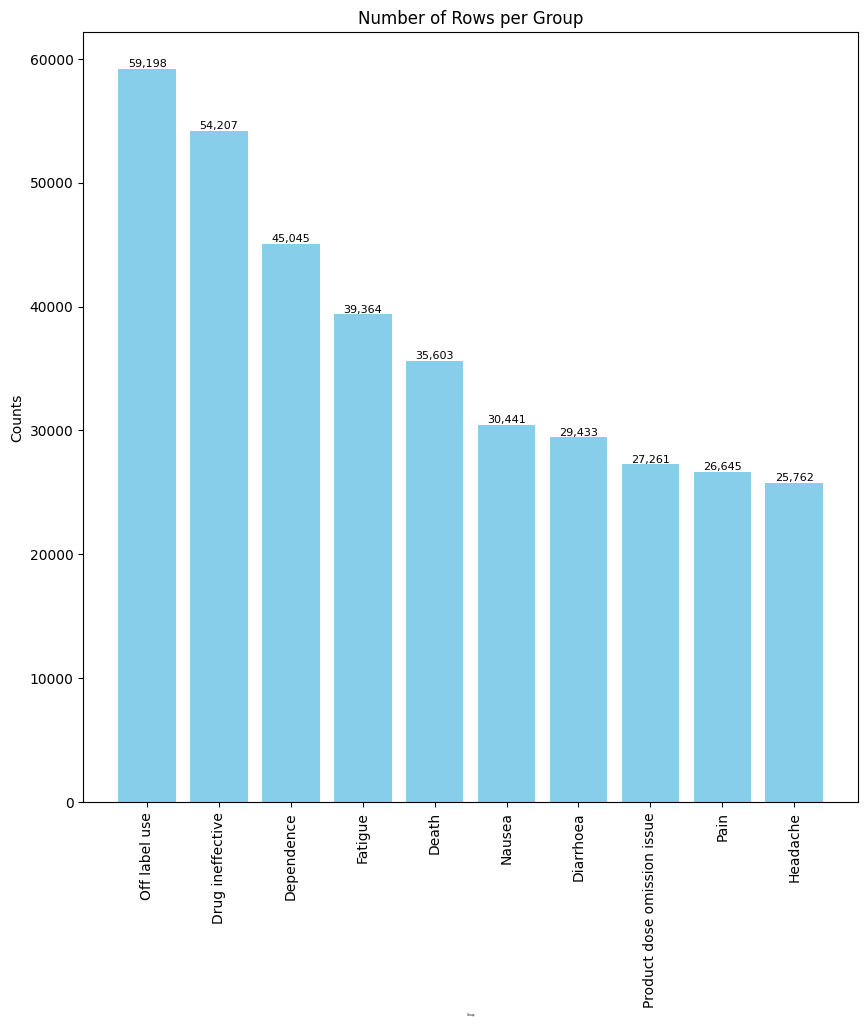

In [ ]:
import matplotlib.pyplot as plt
grouped_df_one = joined_df1.groupby(['pt']).size().reset_index(name='counts')
sorted_group_sizes_one_group = grouped_df_one.sort_values(by='counts', ascending=False).reset_index()

plot_data = sorted_group_sizes_one_group.head(10)
plt.figure(figsize=(10, 10))  # Adjust the figure size as necessary
bars = plt.bar(plot_data['pt'], plot_data['counts'], color='skyblue')
# Adding annotations
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{int(bar.get_height()):,}', ha='center', va='bottom', fontsize=8)

plt.xlabel('Medical Event',  fontsize=2)
plt.ylabel('Cases')
plt.title('Number of Adverse Reaction Cases per Medical Event')
plt.xticks(rotation=90)  # Rotate labels to make them readable if necessary
plt.show()

In [ ]:
select_pt = plot_data.pt.unique()
plot_data_three_group = sorted_group_sizes1[sorted_group_sizes1['pt'].isin(select_pt)]
plot_data_three_group

,index,pt,age_grp,sex,occp_cod,counts,sex_new
3,40168,Off label use,A,F,HP,1770,Female
4,40186,Off label use,E,F,CN,1747,Female
6,15926,Drug ineffective,A,F,MD,1712,Female
9,20296,Fatigue,E,F,CN,1448,Female
10,20278,Fatigue,A,F,CN,1445,Female
...,...,...,...,...,...,...,...
55129,38148,Nausea,C,F,PH,1,Female
56074,24555,Headache,T,M,PH,1,Male
56082,24547,Headache,N,M,LW,1,Male
56092,24546,Headache,I,M,CN,1,Male


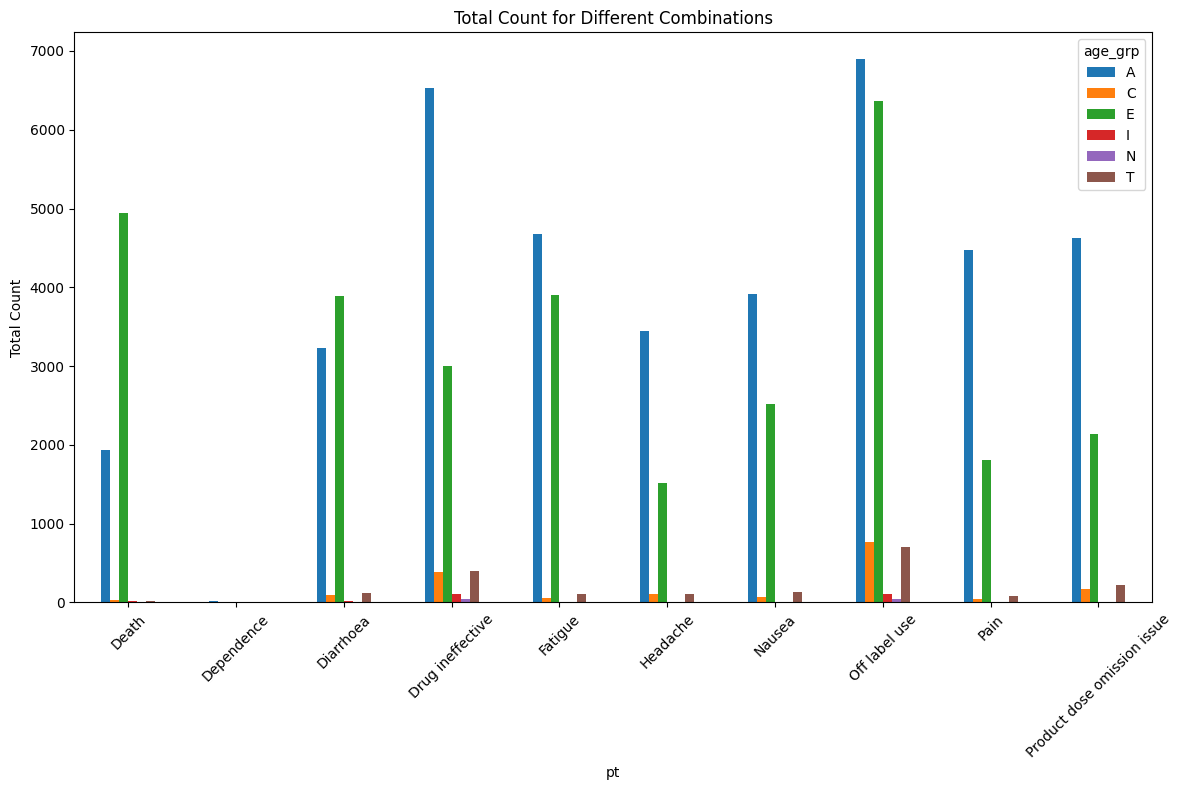

In [ ]:
# Pivot the DataFrame
pivot_df = plot_data_three_group.pivot_table(index='pt', columns=['age_grp'], values='counts', aggfunc='sum')

# Plotting
pivot_df.plot(kind='bar', figsize=(12, 8))
plt.xlabel('pt')
plt.ylabel('Total Count')
plt.title('Total Count for Different Combinations')
plt.xticks(rotation=45)
plt.legend(title='age_grp')
plt.tight_layout()
plt.show()

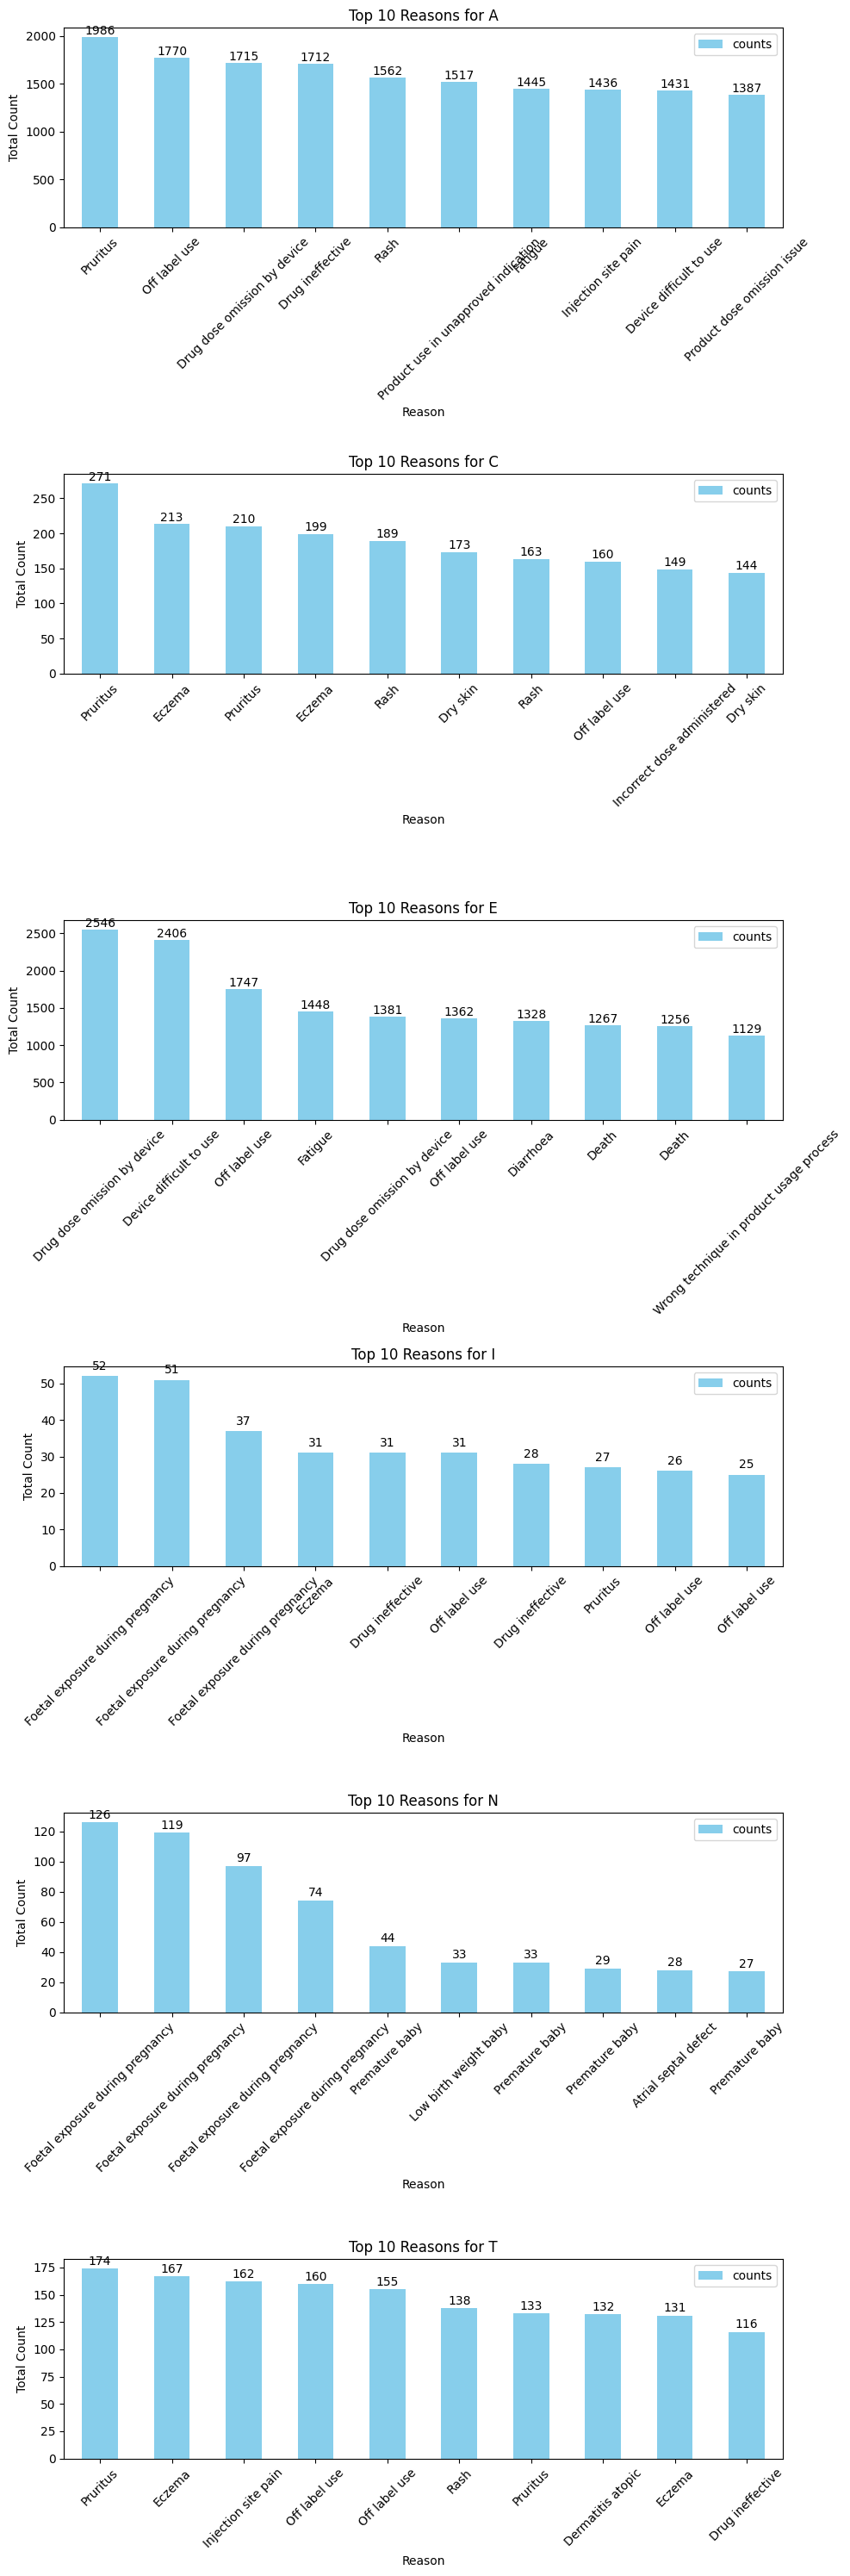

In [ ]:
def top_n(group, n=10):
    return group.sort_values(by='counts', ascending=False).head(n)

# Applying the function within each group of Age
age_group = sorted_group_sizes1.groupby('age_grp').apply(top_n).reset_index(drop=True)

fig, axes = plt.subplots(nrows=6, figsize=(10, 30))

for i, (age_group, data) in enumerate(age_group.groupby('age_grp')):
    ax = axes[i]
    bars = data.plot(kind='bar', x='pt', y='counts', ax=ax, color='skyblue')
    ax.set_title(f'Top 10 Reasons for {age_group}')
    ax.set_xlabel('Reason')
    ax.set_ylabel('Total Count')
    ax.tick_params(axis='x', rotation=45)

            # Annotate each bar with its value
    for bar in bars.patches:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
                f'{bar.get_height():.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
def sex_def(row):
    if row['sex'] == 'F':
          return 'Female'
    elif row['sex'] == 'M':
          return 'Male'
    else:
        return 'Unknown'

sorted_group_sizes1['sex_new'] = sorted_group_sizes1.apply(sex_def, axis=1)
sorted_group_sizes1

,index,pt,age_grp,sex,occp_cod,counts,sex_new
0,15803,Drug dose omission by device,E,F,CN,2546,Female
1,14350,Device difficult to use,E,F,CN,2406,Female
2,46675,Pruritus,A,F,MD,1986,Female
3,40168,Off label use,A,F,HP,1770,Female
4,40186,Off label use,E,F,CN,1747,Female
...,...,...,...,...,...,...,...
60532,28416,Impaired fasting glucose,E,F,PH,1,Female
60533,28415,Impaired fasting glucose,E,F,CN,1,Female
60534,28414,Impaired fasting glucose,A,F,MD,1,Female
60535,28413,Impaired driving ability,E,M,MD,1,Male


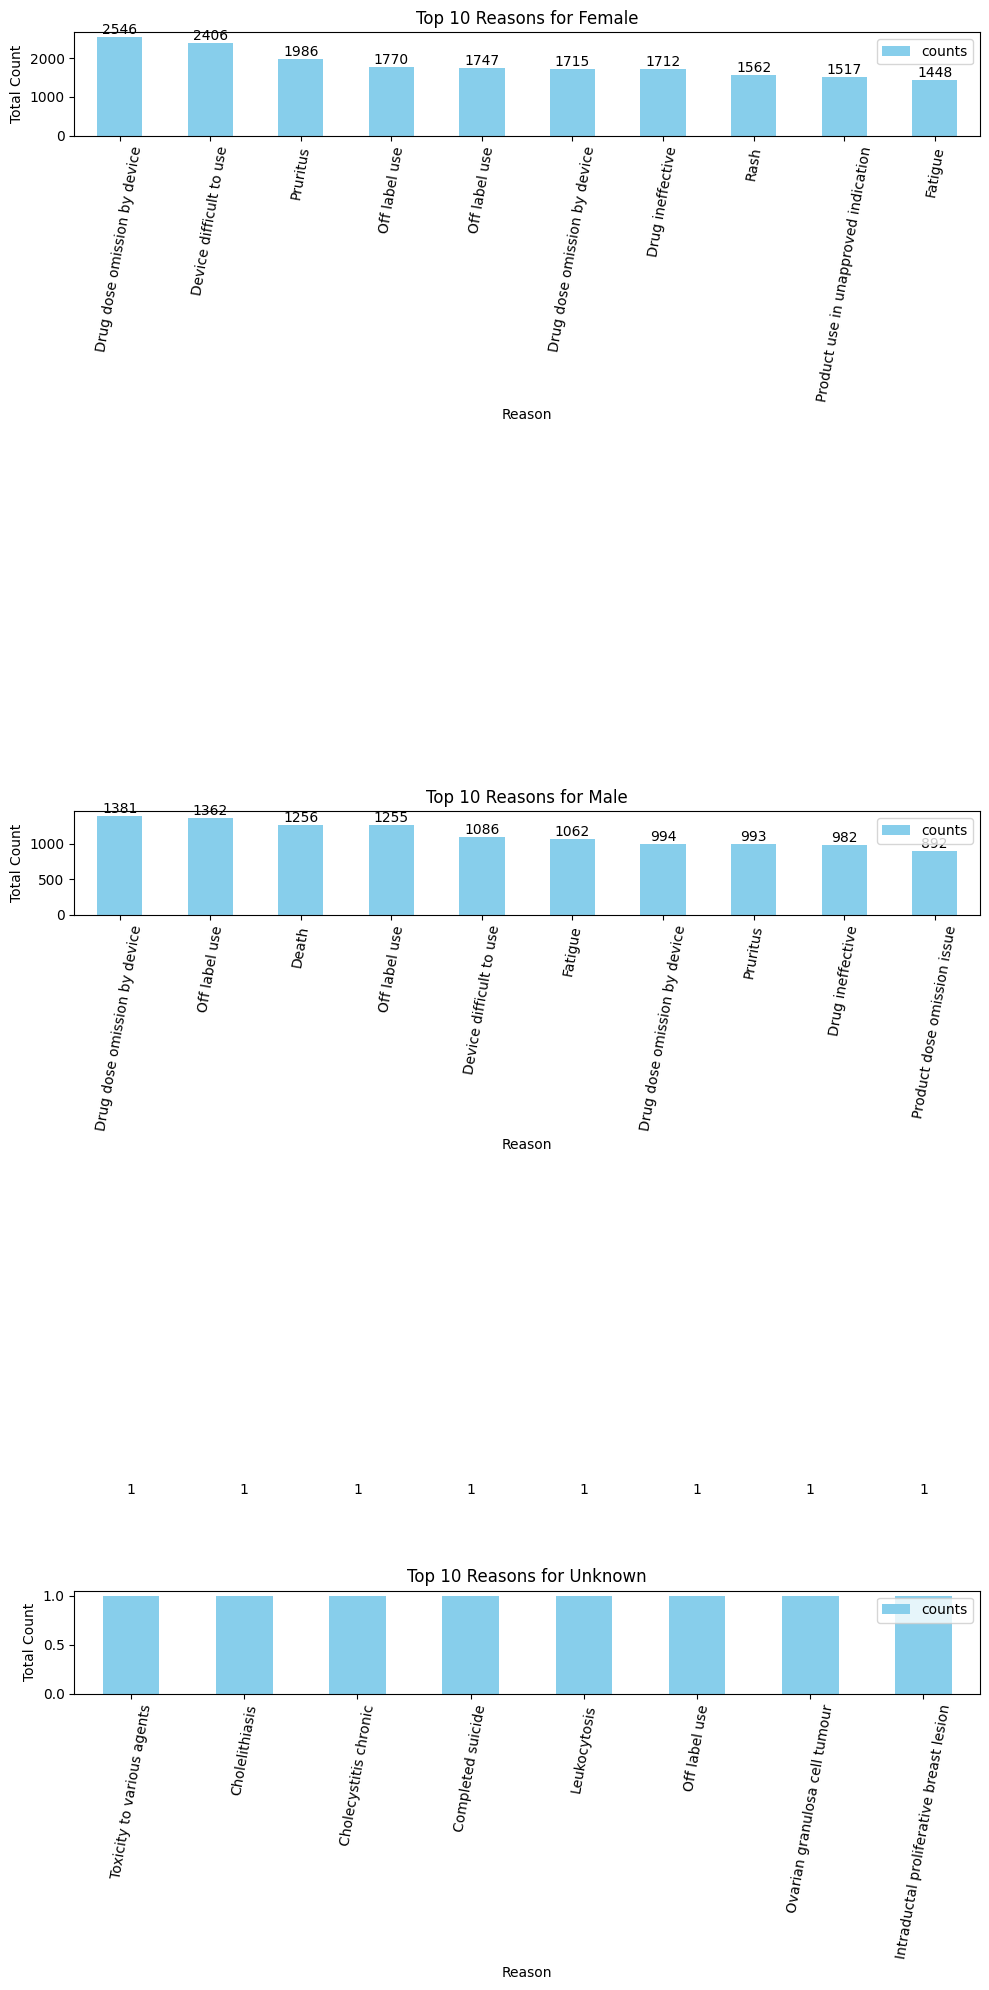

In [ ]:


def top_n(group, n=10):
    return group.sort_values(by='counts', ascending=False).head(n)

# Applying the function within each group of Age
age_group = sorted_group_sizes1.groupby('sex_new').apply(top_n).reset_index(drop=True)

fig, axes = plt.subplots(nrows=3, figsize=(10, 20))

for i, (age_group, data) in enumerate(age_group.groupby('sex_new')):
    ax = axes[i]
    bars = data.plot(kind='bar', x='pt', y='counts', ax=ax, color='skyblue')
    ax.set_title(f'Top 10 Reasons for {age_group}')
    ax.set_xlabel('Reason')
    ax.set_ylabel('Total Count')
    ax.tick_params(axis='x', rotation=80)

        # Annotate each bar with its value
    for bar in bars.patches:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
                f'{bar.get_height():.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

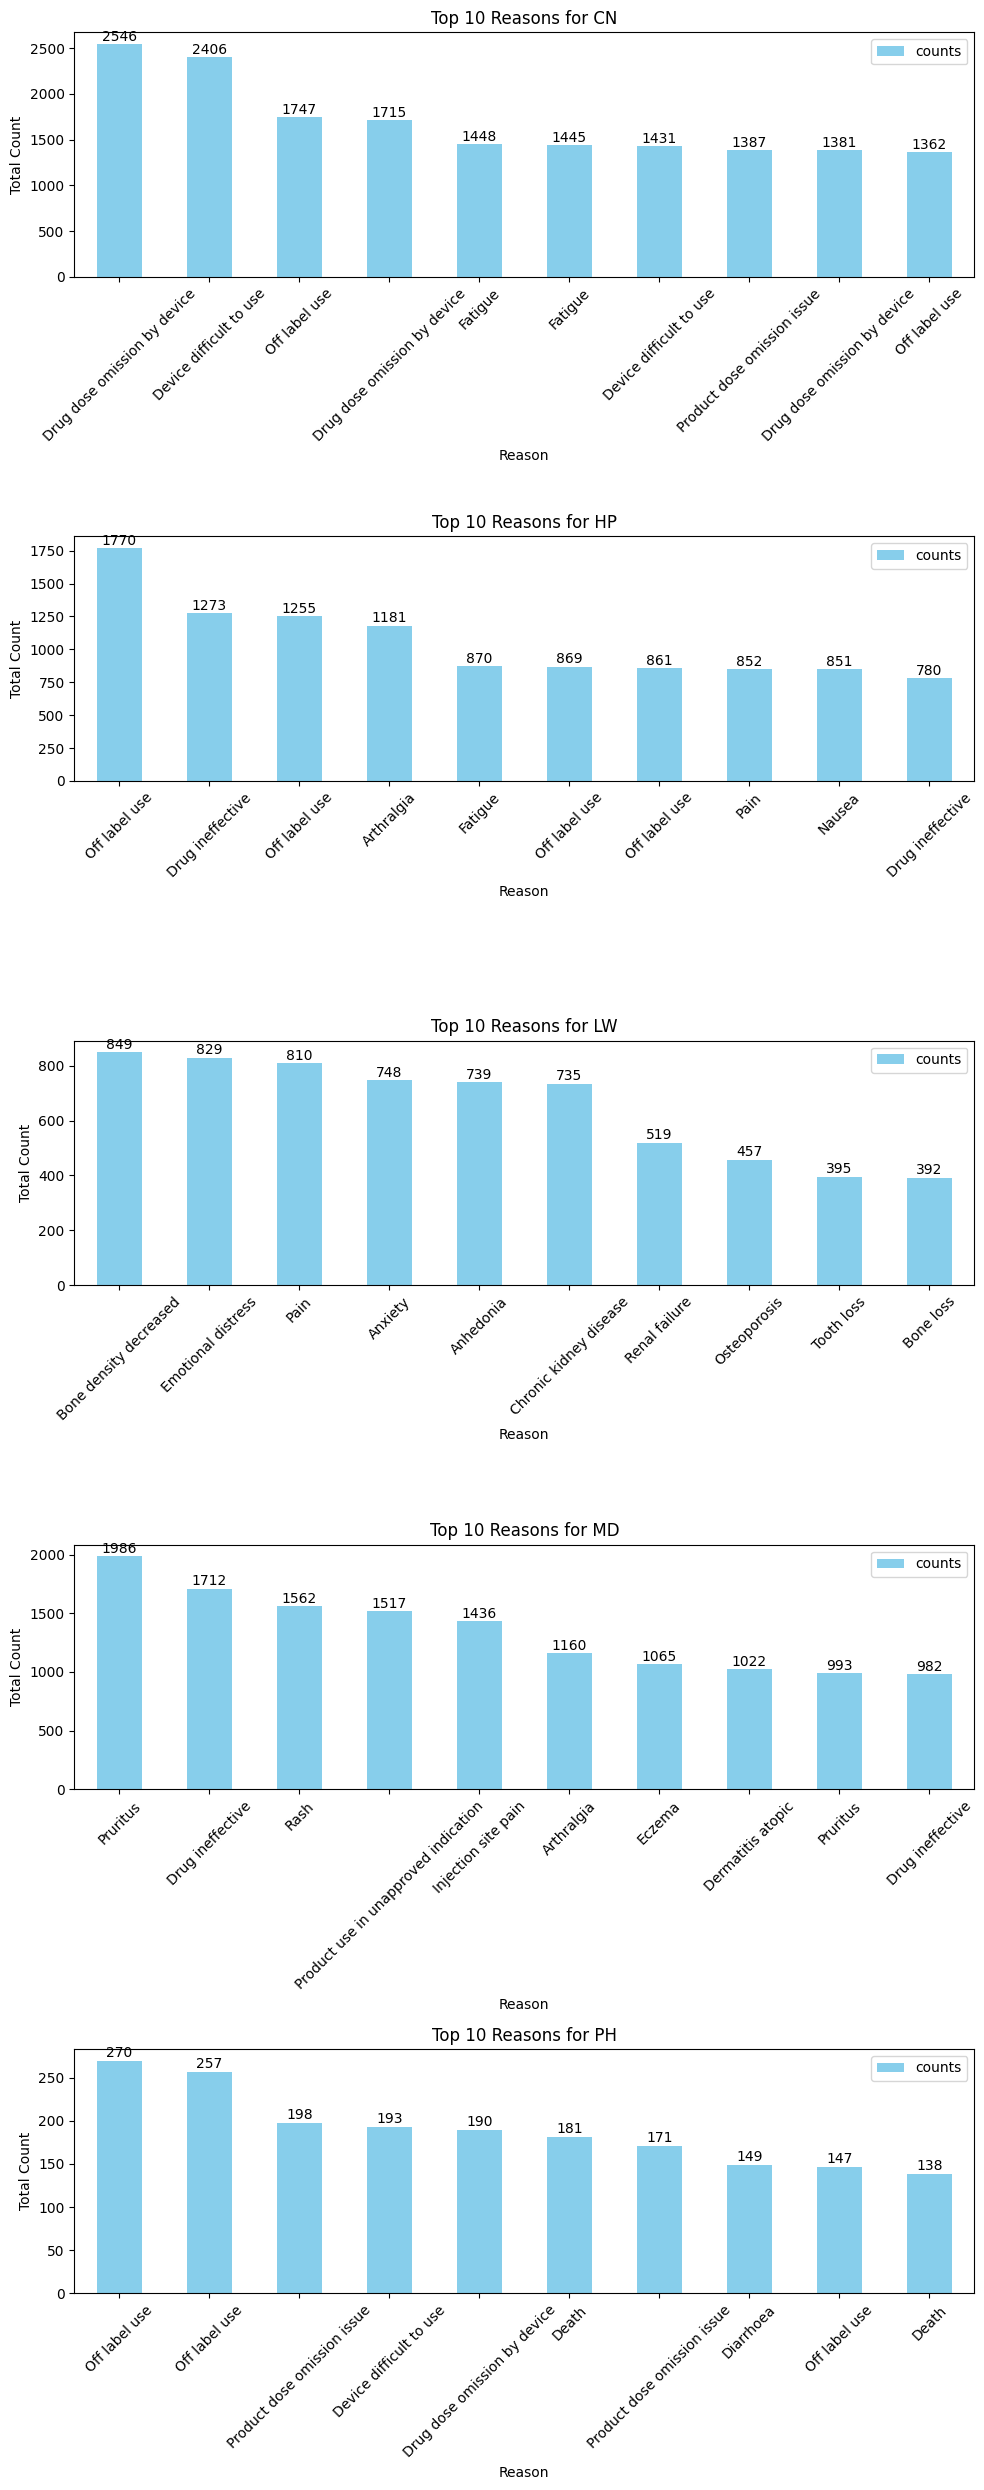

In [ ]:
def top_n(group, n=10):
    return group.sort_values(by='counts', ascending=False).head(n)

# Applying the function within each group of Age
age_group = sorted_group_sizes1.groupby('occp_cod').apply(top_n).reset_index(drop=True)

fig, axes = plt.subplots(nrows=5, figsize=(10, 25))

for i, (age_group, data) in enumerate(age_group.groupby('occp_cod')):
    ax = axes[i]
    bars =  data.plot(kind='bar', x='pt', y='counts', ax=ax, color='skyblue')
    ax.set_title(f'Top 10 Reasons for {age_group}')
    ax.set_xlabel('Reason')
    ax.set_ylabel('Total Count')
    ax.tick_params(axis='x', rotation=45)

    # Annotate each bar with its value
    for bar in bars.patches:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
                f'{bar.get_height():.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
joined_df2 = demo_append[demo_append['i_f_code']=='I'].merge(rpsr_append , how='inner', on='primaryid')
# Grouping by 'key_column' and summing 'value1' and 'value2'
grouped_df = joined_df2.groupby('rpsr_cod').size().reset_index(name='counts')
sorted_group_sizes2 = grouped_df.sort_values(by='counts', ascending=False)
print(sorted_group_sizes2)

  rpsr_cod  counts
2       HP   17363
0      CSM    7245
1      FGN     153
3      LIT       1


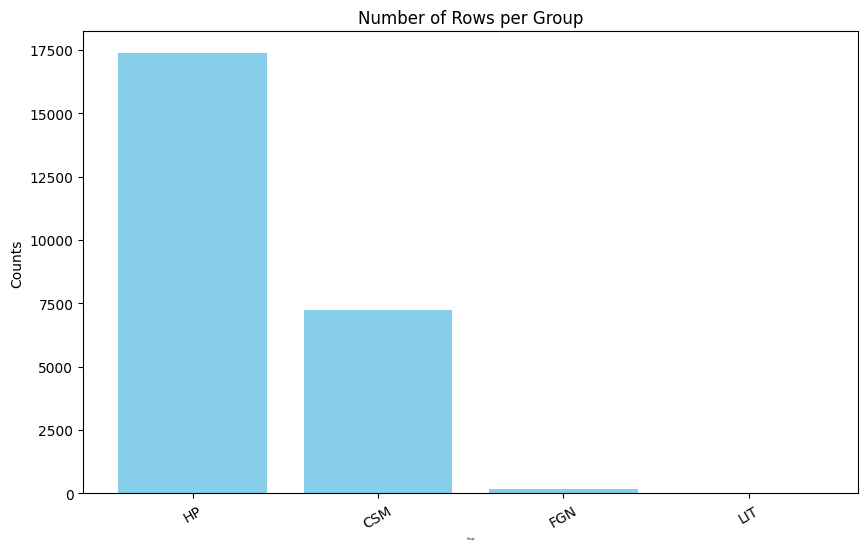

In [ ]:
plot_data = sorted_group_sizes2.head(10)
plt.figure(figsize=(10, 6))  # Adjust the figure size as necessary
plt.bar(plot_data['rpsr_cod'], plot_data['counts'], color='skyblue')
plt.xlabel('Group',  fontsize=2)
plt.ylabel('Counts')
plt.title('Number of Rows per Group')
plt.xticks(rotation=30)  # Rotate labels to make them readable if necessary
plt.show()

In [ ]:
!pip install plotly.express
